In [16]:
import tensorflow as tf
from tensorflow.keras import models, datasets, layers
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dropout
import splitfolders
import keras
import pickle

In [62]:
# splitfolders.ratio("Alzheimer_Dataset", output="output",seed=1345,ratio=(0.8,0.1,0.1))

In [17]:



train_set = keras.utils.image_dataset_from_directory(
    "./output/train",
    seed = 123,
    batch_size = 32,
    image_size = (128,128)
)


test_set = keras.utils.image_dataset_from_directory(
    "./output/test",
    seed = 123,
    batch_size = 32,
    image_size = (128,128)
)

val_set = keras.utils.image_dataset_from_directory(
    "./output/train",
    seed = 123,
    batch_size = 32,
    image_size = (128,128)
)


Found 5119 files belonging to 4 classes.
Found 642 files belonging to 4 classes.
Found 5119 files belonging to 4 classes.


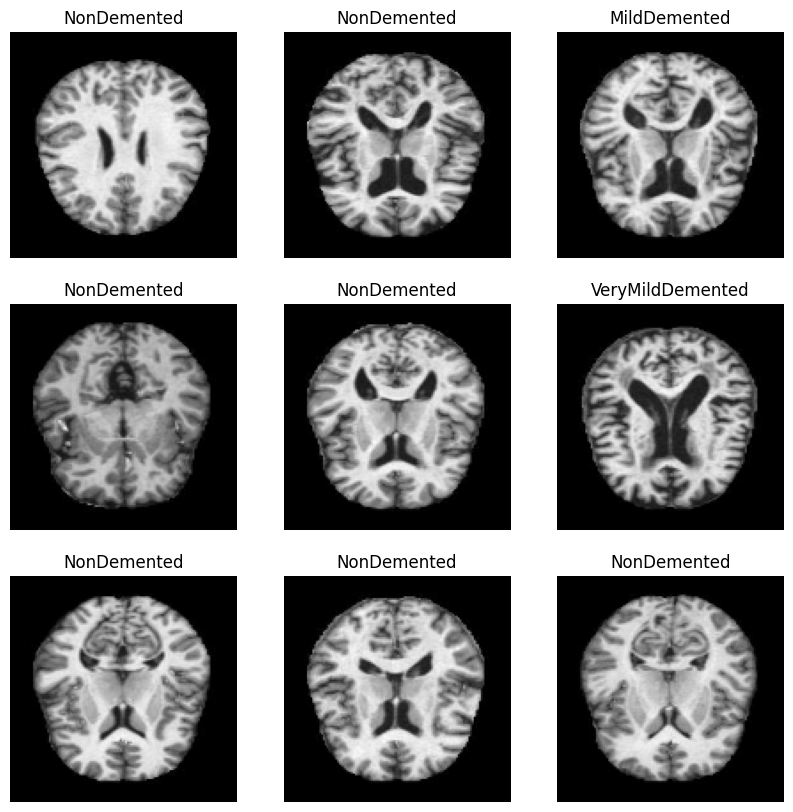

In [3]:
# class_names = train_set.class_names

# plt.figure(figsize=(10, 10))
# for images, labels in train_set.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(class_names[labels[i]])
#         plt.axis("off")



In [20]:
cnn = tf.keras.models.Sequential()

cnn.add(keras.layers.experimental.preprocessing.Rescaling(scale=1./255, offset=-1, input_shape=(128,128, 3)))

cnn.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, activation = "relu",padding='same',kernel_initializer="he_normal"))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))

cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu",padding='same',kernel_initializer="he_normal"))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))

cnn.add(keras.layers.Dropout(0.20))

cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = "relu",padding='same',kernel_initializer="he_normal"))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))

cnn.add(keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu',kernel_initializer="he_normal"))
cnn.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 4, activation = 'softmax'))



In [21]:
# cnn.summary()

In [22]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = cnn.fit(train_set, validation_data = val_set, epochs = 15,batch_size=32,verbose=1 )

Epoch 1/15
160/160 [==============================] - 91s 553ms/step - loss: 1.4347 - accuracy: 0.4956 - val_loss: 0.9854 - val_accuracy: 0.5255
Epoch 2/15
160/160 [==============================] - 105s 657ms/step - loss: 0.9406 - accuracy: 0.5562 - val_loss: 0.9246 - val_accuracy: 0.5927
Epoch 3/15
160/160 [==============================] - 110s 687ms/step - loss: 0.8893 - accuracy: 0.5790 - val_loss: 0.9023 - val_accuracy: 0.6042
Epoch 4/15
160/160 [==============================] - 105s 657ms/step - loss: 0.8222 - accuracy: 0.6202 - val_loss: 0.7454 - val_accuracy: 0.6591
Epoch 5/15
160/160 [==============================] - 107s 666ms/step - loss: 0.7522 - accuracy: 0.6568 - val_loss: 0.6124 - val_accuracy: 0.7648
Epoch 6/15
160/160 [==============================] - 105s 657ms/step - loss: 0.6663 - accuracy: 0.6996 - val_loss: 0.4638 - val_accuracy: 0.8336
Epoch 7/15
160/160 [==============================] - 107s 666ms/step - loss: 0.5225 - accuracy: 0.7748 - val_loss: 0.3918 - 

In [23]:
pickle.dump(cnn, open('model.pkl', 'wb'))

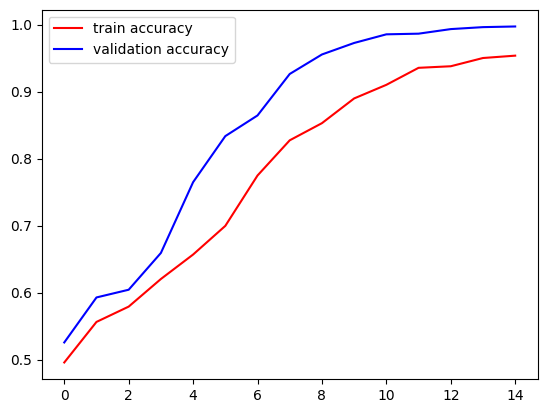

In [24]:
# plt.plot(history.history['accuracy'],color='red',label='train accuracy')
# plt.plot(history.history['val_accuracy'], color = 'blue', label='validation accuracy')
# plt.legend()
# plt.show()

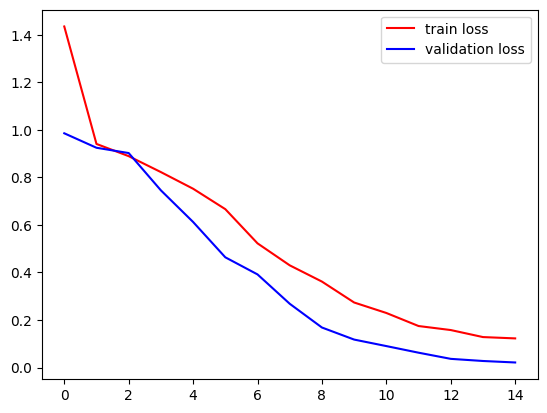

In [25]:
# plt.plot(history.history['loss'],color='red',label='train loss')
# plt.plot(history.history['val_loss'], color = 'blue', label='validation loss')
# plt.legend()
# plt.show()

In [9]:
# cnn.save('model.save')

In [26]:
# loss, accuracy = cnn.evaluate(test_set)

21/21 [==============================] - 4s 152ms/step - loss: 0.0912 - accuracy: 0.9688


In [ ]:
# from keras.preprocessing.image import load_img, img_to_array
# img = load_img('./Alzheimer_Dataset/NonDemented/30 (12).jpg', target_size=(128, 128))
# img = img_to_array(img)
# img = np.expand_dims(img, axis = 0)


# prediction = cnn.predict(img)
# y_classes = prediction.argmax(axis=-1)
# print(y_classes)
# class_names
